<a href="https://colab.research.google.com/github/jardinthee/codetree-TILs/blob/main/18_Using_Myimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**직접모은 이미지로 분류모델을 만드는 법을 알아본다**

이미지 다운로드와 압축풀기


In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

이미지 읽어서 데이터 준비하기

In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


독립변수와 종속변수를 변형
(모델을 가져와서 뉴럴 네트워크에 적용하려면 이미지가 4차원 형태여야함)
+원핫 인코딩

In [3]:
독립 = 독립.reshape(18724,28,28,1)
종속 = pd.get_dummies(종속)

print(독립.shape,종속.shape)

(18724, 28, 28, 1) (18724, 10)


**모델 만들기+학습**

In [5]:
import tensorflow as tf

X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(6, kernel_size =5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H= tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10,activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

model.fit(독립,종속,epochs=10)

Epoch 1/10
586/586 [==============================] - 7s 6ms/step - loss: 0.5091 - accuracy: 0.8555
Epoch 2/10
586/586 [==============================] - 3s 5ms/step - loss: 0.2670 - accuracy: 0.9202
Epoch 3/10
586/586 [==============================] - 3s 5ms/step - loss: 0.2112 - accuracy: 0.9358
Epoch 4/10
586/586 [==============================] - 3s 5ms/step - loss: 0.1740 - accuracy: 0.9456
Epoch 5/10
586/586 [==============================] - 3s 5ms/step - loss: 0.1488 - accuracy: 0.9533
Epoch 6/10
586/586 [==============================] - 3s 6ms/step - loss: 0.1243 - accuracy: 0.9598
Epoch 7/10
586/586 [==============================] - 3s 4ms/step - loss: 0.1058 - accuracy: 0.9673
Epoch 8/10
586/586 [==============================] - 3s 5ms/step - loss: 0.0896 - accuracy: 0.9723
Epoch 9/10
586/586 [==============================] - 3s 5ms/step - loss: 0.0760 - accuracy: 0.9764
Epoch 10/10
586/586 [==============================] - 4s 6ms/step - loss: 0.0639 - accuracy: 0.9788

**종속변수와 독립변수를 출력하여 눈으로 확인**

In [7]:
종속[0:10]

,A,B,C,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,0,0,1,0,0,0,0,0,0


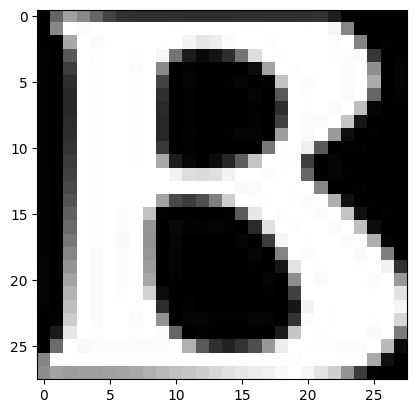

In [9]:
plt.imshow(독립[0],cmap='gray')